# Avançando no Machine Learning: Classificação
---- 

## Aula 1: Classificação

### `Importando Bibliotecas`

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


### Importando os dados

In [7]:
df = pd.read_csv('./dados/Customer-Churn.csv')
df.shape

(7043, 18)

In [8]:
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


### Diferentes varíaveis

In [9]:
# Binarizando colunas categoricas 
traducao_dic = {'Sim': 1,
                'Nao': 0}

datamod = df[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
datamod

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [10]:
# Transformação pelo get dummies
data_dummies = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                      axis = 1))

# Junção dos dados transformados com os que já tinhamos 
df_final = pd.concat([datamod, data_dummies], axis =1)

In [11]:
df_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [12]:
df_final.shape

(7043, 39)

### Balanceando dados

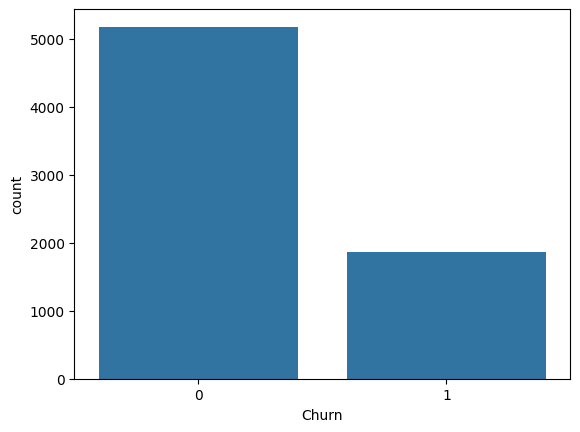

In [15]:
# Checando se há desbalanceamento nos dados
ax = sns.countplot(x='Churn', data=df_final)

In [16]:
# Usando o SMOTE para realizar o balanceamento
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 KB 3.4 MB/s eta 0:00:00m eta 0:00:010:01


In [ ]:
from imblearn.over_sampling import SMOTE

X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']


# Realizando a reamostragem do conjunto de dados
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)  

df_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df_final.head(2)


In [ ]:
# Checando se a variavel target ficou balanceada
ax = sns.countplot(x='Churn', data=df_final)  

## Aula 2: Método baseado em proximidade
---

### Introdução ao Algoritimo KNN

In [18]:
# Divisão dos dados
X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']

In [19]:
# Biblioteca para padronizar os dados 
from sklearn.preprocessing import StandardScaler

In [20]:
# Instanciando o StandardScaler
norm = StandardScaler()

In [21]:
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [22]:
X_normalizado[0]

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.16032292, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

### Implementando o KNN

In [ ]:
# Importando modelo
from sklearn.model_selection import train_test_split

In [ ]:
# Separando Treino e Test
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size = 0.3, random_state = 123)

### Treino e teste

In [ ]:
# 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#
knn = KNeighborsClassifier